# Purpose of this project

The purpose of this project is to create groupings of at risk for sudden death heart failure patients. This will enable the determination those most at-risk of sudden death and, if desired, predict which group patients belong. 







# The Mayo Clinic describes heart failure as: 

"Heart failure occurs when the heart muscle doesn't pump blood as well as it should. When this happens, blood often backs up and fluid can build up in the lungs, causing shortness of breath.

Certain heart conditions gradually leave the heart too weak or stiff to fill and pump blood properly. These conditions include narrowed arteries in the heart and high blood pressure.

..heart failure can be life-threatening. People with heart failure may have severe symptoms. Some may need a heart transplant or a device to help the heart pump blood.

Heart failure is sometimes called congestive heart failure.


Symptoms may develop slowly. Sometimes, heart failure symptoms start suddenly. Heart failure symptoms may include:

Shortness of breath with activity or when lying down.
Fatigue and weakness.
Swelling in the legs, ankles and feet.
Rapid or irregular heartbeat.
Reduced ability to exercise.
Wheezing.
A cough that doesn't go away or a cough that brings up white or pink mucus with spots of blood.
Swelling of the belly area.
Very rapid weight gain from fluid buildup.
Nausea and lack of appetite.
Difficulty concentrating or decreased alertness.
Chest pain if heart failure is caused by a heart attack."

Source: https://www.mayoclinic.org/diseases-conditions/heart-failure/symptoms-causes/syc-20373142


Dataset Source: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Provide the names, email addresses, institutions, and other contact information of the donors and creators of the data set.The original dataset version was collected by Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza 
(Government College University, Faisalabad, Pakistan) and made available by them on FigShare under the Attribution 4.0 International (CC BY 4.0: freedom to share and adapt the material) copyright in July 2017.

The current version of the dataset was elaborated by Davide Chicco (Krembil Research Institute, Toronto, Canada) and donated to the University of California Irvine Machine Learning Repository under the same Attribution 4.0 International (CC BY 4.0) copyright in January 2020. Davide Chicco can be reached at <davidechicco '@' davidechicco.it>


Data Set Information:

A detailed description of the dataset can be found in the Dataset section of the following paper:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link]


Attribute Information:

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

For more information, please check Table 1, Table 2, and Table 3 of the following paper:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link]


Relevant Papers:

Original dataset version:

Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza: "Survival analysis of heart failure patients: a case study". PLoS ONE 12(7), 0181001 (2017). [Web Link]

Current dataset version on the UCI ML Repository:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link]



Citation Request:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link]

We will use the following variables based on the literature: creatine phosphokinase level, ejection fraction, age and high_blood_pressure.

More information on heart failure is available at the links below:


Additional heart failure-related research: 

https://pubmed.ncbi.nlm.nih.gov/10577445/
https://www.aafp.org/pubs/afp/issues/2012/0615/p1161.html


In [265]:
# Import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [266]:
# Assign dataset to a variable

data = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"




In [267]:
# Establish dataframe variable

df = pd.read_csv(data) 


In [268]:
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [269]:
df = df.drop(columns = ["anaemia", "diabetes", "ejection_fraction", "high_blood_pressure", "sex", "smoking", "time", "DEATH_EVENT"])

In [270]:
# Determine the number of rows and columns

df.shape

(299, 5)

In [271]:
# The first five rows 

df.head()

,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium
0,75.0,582,265000.00,1.9,130
1,55.0,7861,263358.03,1.1,136
2,65.0,146,162000.00,1.3,129
3,50.0,111,210000.00,1.9,137
4,65.0,160,327000.00,2.7,116


In [272]:
# The structure of the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    int64  
 2   platelets                 299 non-null    float64
 3   serum_creatinine          299 non-null    float64
 4   serum_sodium              299 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 11.8 KB


In [273]:
# The number of null values 

df.isnull().sum()

age                         0
creatinine_phosphokinase    0
platelets                   0
serum_creatinine            0
serum_sodium                0
dtype: int64

In [274]:
# The number of NA values

df.isna().sum()

age                         0
creatinine_phosphokinase    0
platelets                   0
serum_creatinine            0
serum_sodium                0
dtype: int64

<AxesSubplot:xlabel='age'>

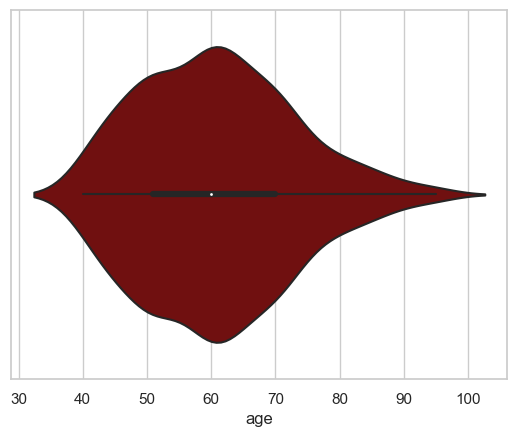

In [275]:
# A violin plot of the age column 

import seaborn

seaborn.set(style = "whitegrid")

seaborn.violinplot(x = "age",
                  data = df,
                   color = "maroon"
                  )



<AxesSubplot:xlabel='creatinine_phosphokinase'>

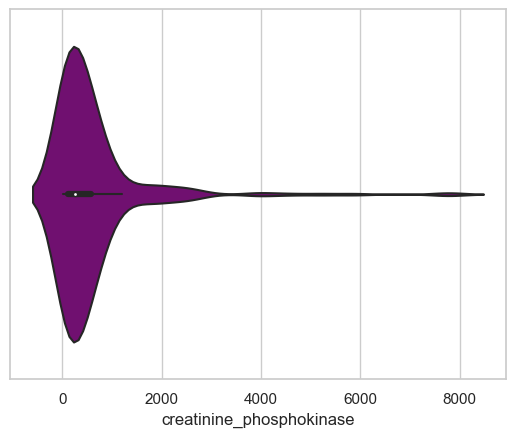

In [276]:
# A violinplot of the creatinine_phosphokinase column

seaborn.set(style = "whitegrid")

seaborn.violinplot(x = "creatinine_phosphokinase",
                  data = df,
                  color = "purple"
                  )



<AxesSubplot:xlabel='platelets'>

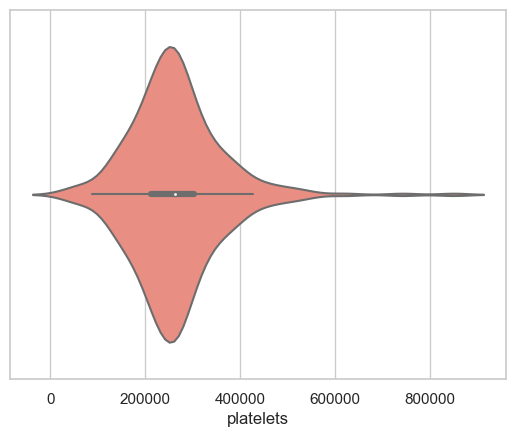

In [277]:
# A violin plot of the platelets column

seaborn.set(style = "whitegrid")

seaborn.violinplot(x = "platelets",
                  data = df,
                  color = "salmon"
                  )


<AxesSubplot:xlabel='serum_creatinine'>

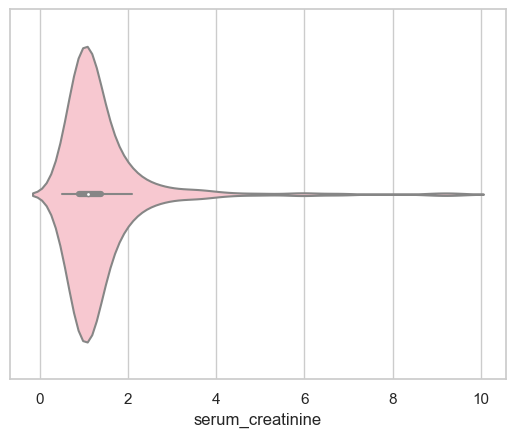

In [278]:
# A violinplot of the serum_creatinine column

seaborn.set(style = "whitegrid")

seaborn.violinplot(x = "serum_creatinine",
                  data = df,
                  color = "pink")


<AxesSubplot:xlabel='serum_sodium'>

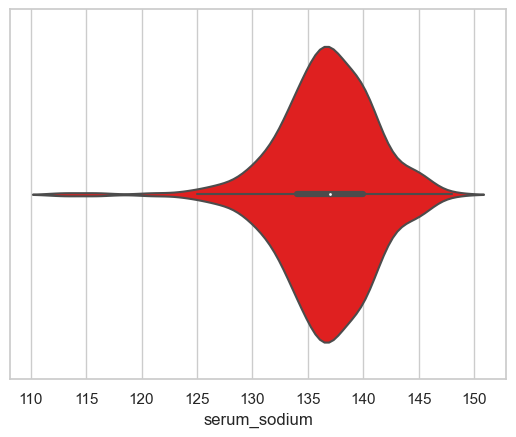

In [279]:
# A violinplot of the serum_sodium column.


seaborn.set(style = "whitegrid")

seaborn.violinplot(x = "serum_sodium",
                  data = df,
                  color = "red")


In [280]:
# A correlation table of all the features. Worthy of note is that all the feature pairiings have relatively weak correlations.

df.corr()

,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium
age,1.000000,-0.081584,-0.052354,0.159187,-0.045966
creatinine_phosphokinase,-0.081584,1.000000,0.024463,-0.016408,0.059550
platelets,-0.052354,0.024463,1.000000,-0.041198,0.062125
serum_creatinine,0.159187,-0.016408,-0.041198,1.000000,-0.189095
serum_sodium,-0.045966,0.059550,0.062125,-0.189095,1.000000


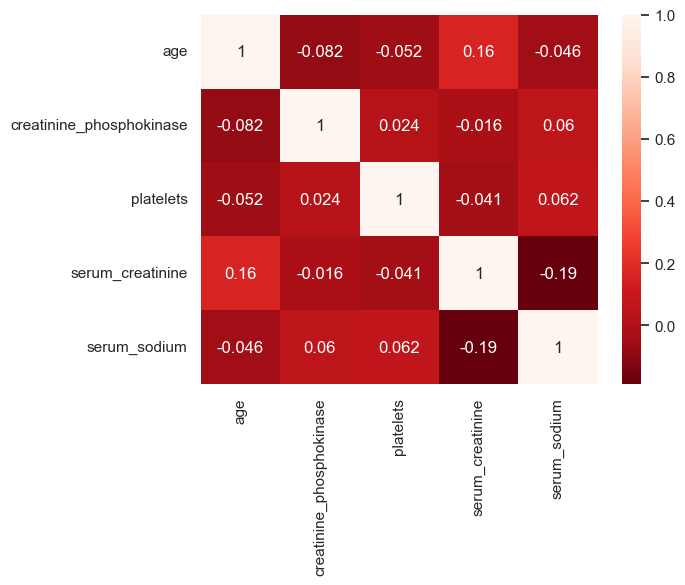

In [281]:
# A correlation plot of the table above.

dataplot = seaborn.heatmap(df.corr(), annot = True, cmap ="Reds_r")

plt.show()

In [282]:
# Define the features and the outcome

X = df.iloc[:, :4]
y = df.iloc[:, 4]

In [283]:
# Printed the value of X to ensure all the date was accounted for.
print(X)

      age  creatinine_phosphokinase  platelets  serum_creatinine
0    75.0                       582  265000.00               1.9
1    55.0                      7861  263358.03               1.1
2    65.0                       146  162000.00               1.3
3    50.0                       111  210000.00               1.9
4    65.0                       160  327000.00               2.7
..    ...                       ...        ...               ...
294  62.0                        61  155000.00               1.1
295  55.0                      1820  270000.00               1.2
296  45.0                      2060  742000.00               0.8
297  45.0                      2413  140000.00               1.4
298  50.0                       196  395000.00               1.6

[299 rows x 4 columns]


In [284]:
# Import sklearn StandardScaler to scale and standardize the features

from sklearn.preprocessing import StandardScaler


# Standardize the features

scaler = StandardScaler()
X_std = scaler.fit_transform(X)



In [285]:
# Time to cluster!

In [286]:
# Gaussian Mixture Model 

In [287]:
# Import Packages

from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics 

In [288]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
gm_clusters = gmm_cluster.fit_predict(X_std)

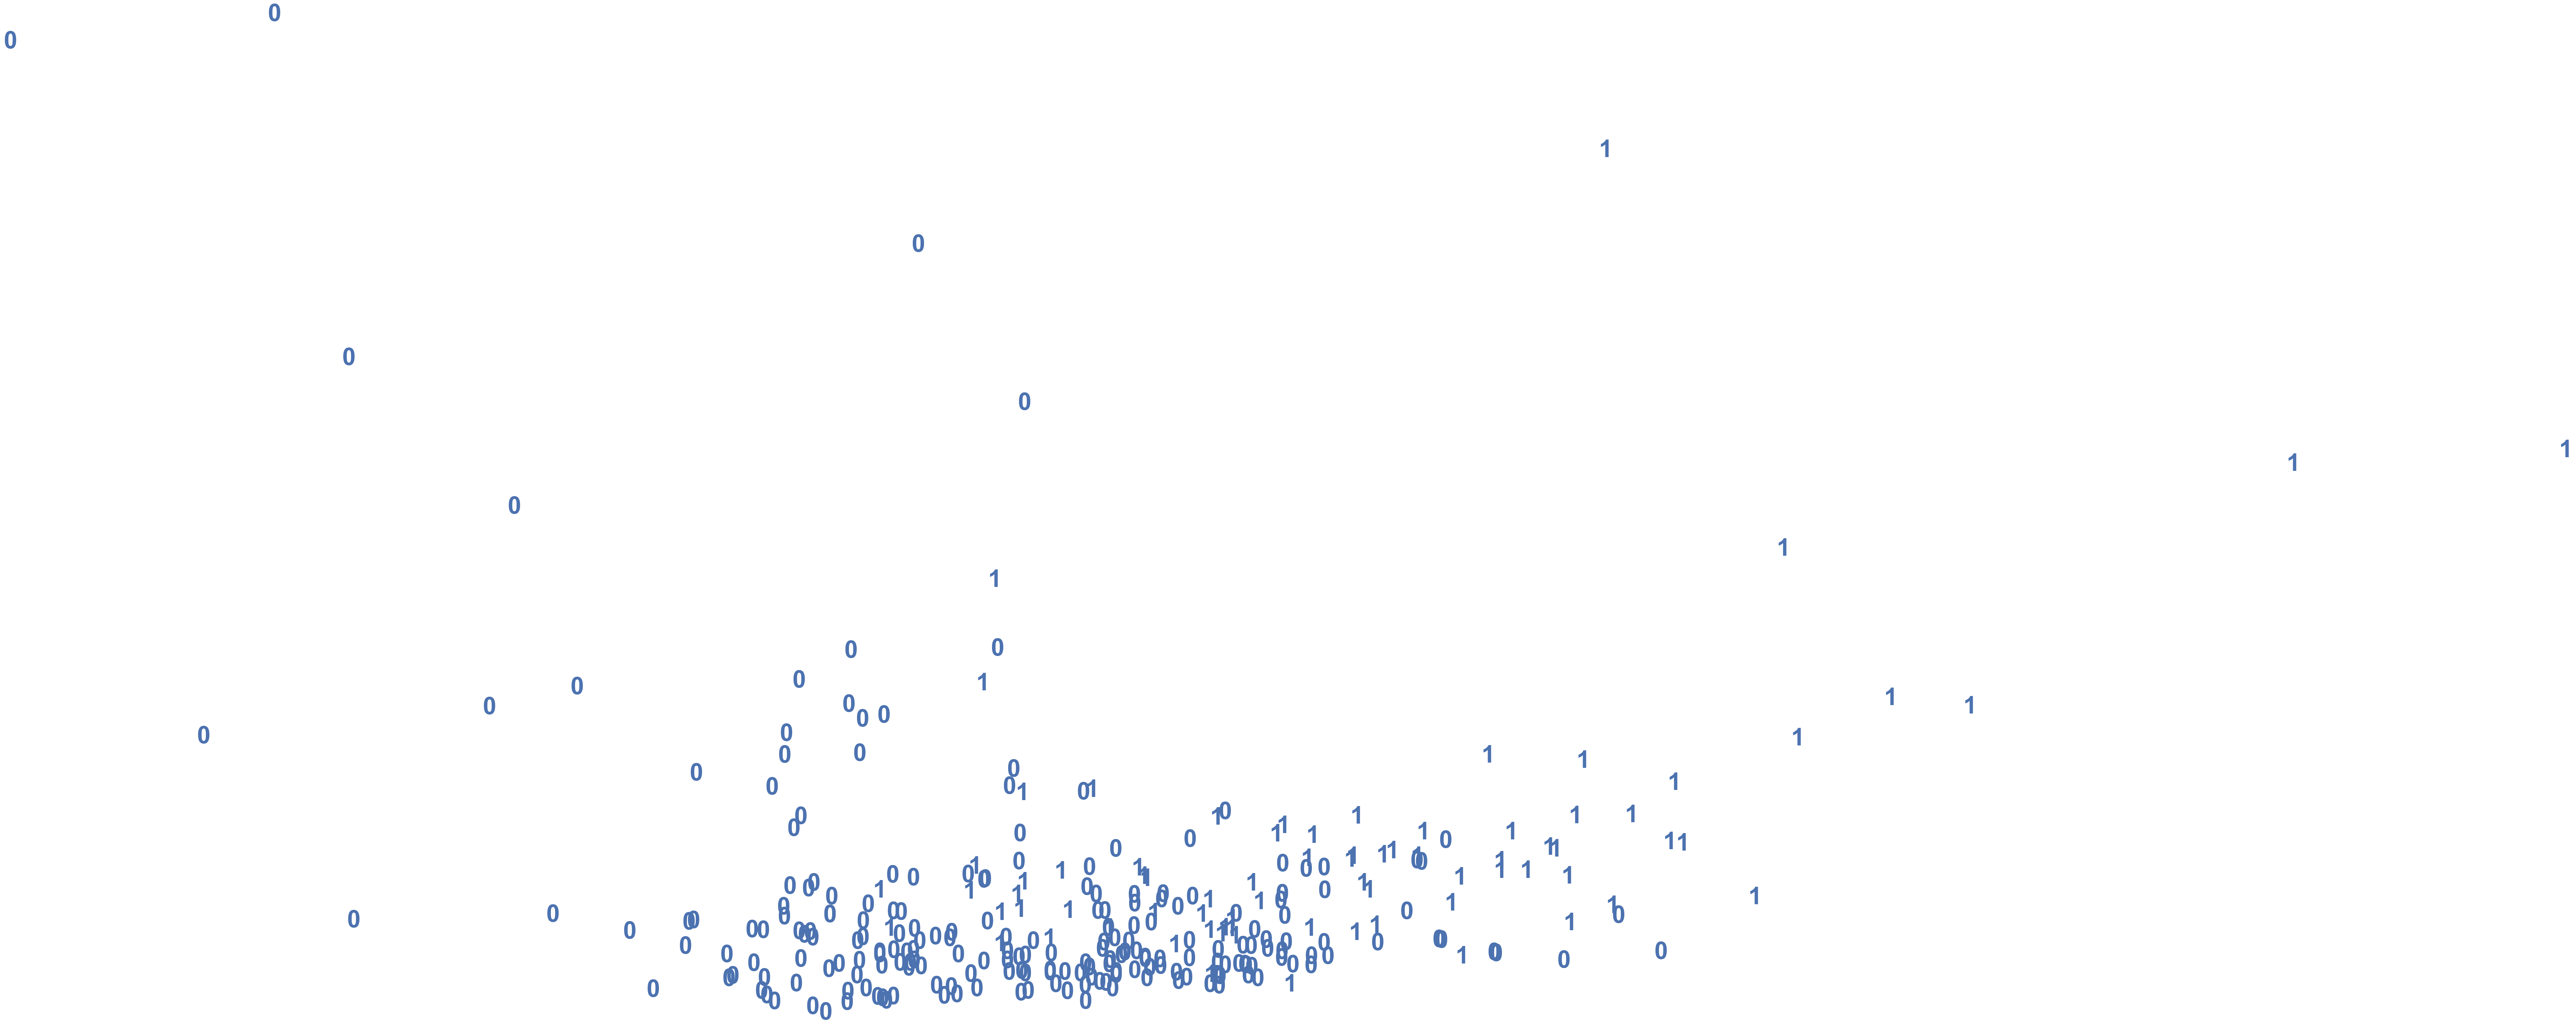

In [289]:
# Perform the PCA transformation 

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'C0'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gm_clusters[i]),
             color=colours,
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [290]:
print("Adjusted Rand Index of the GMM solution: {}"
     .format(metrics.adjusted_rand_score(y, gm_clusters)))

print("The silhouette score of the GMM solution: {}"
     .format(metrics.silhouette_score(X_std, gm_clusters, metric = "euclidean")))

Adjusted Rand Index of the GMM solution: 0.019898345652120942
The silhouette score of the GMM solution: 0.18673999770639643


In [291]:
# K-means 

In [292]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)





36.4 ms ± 477 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


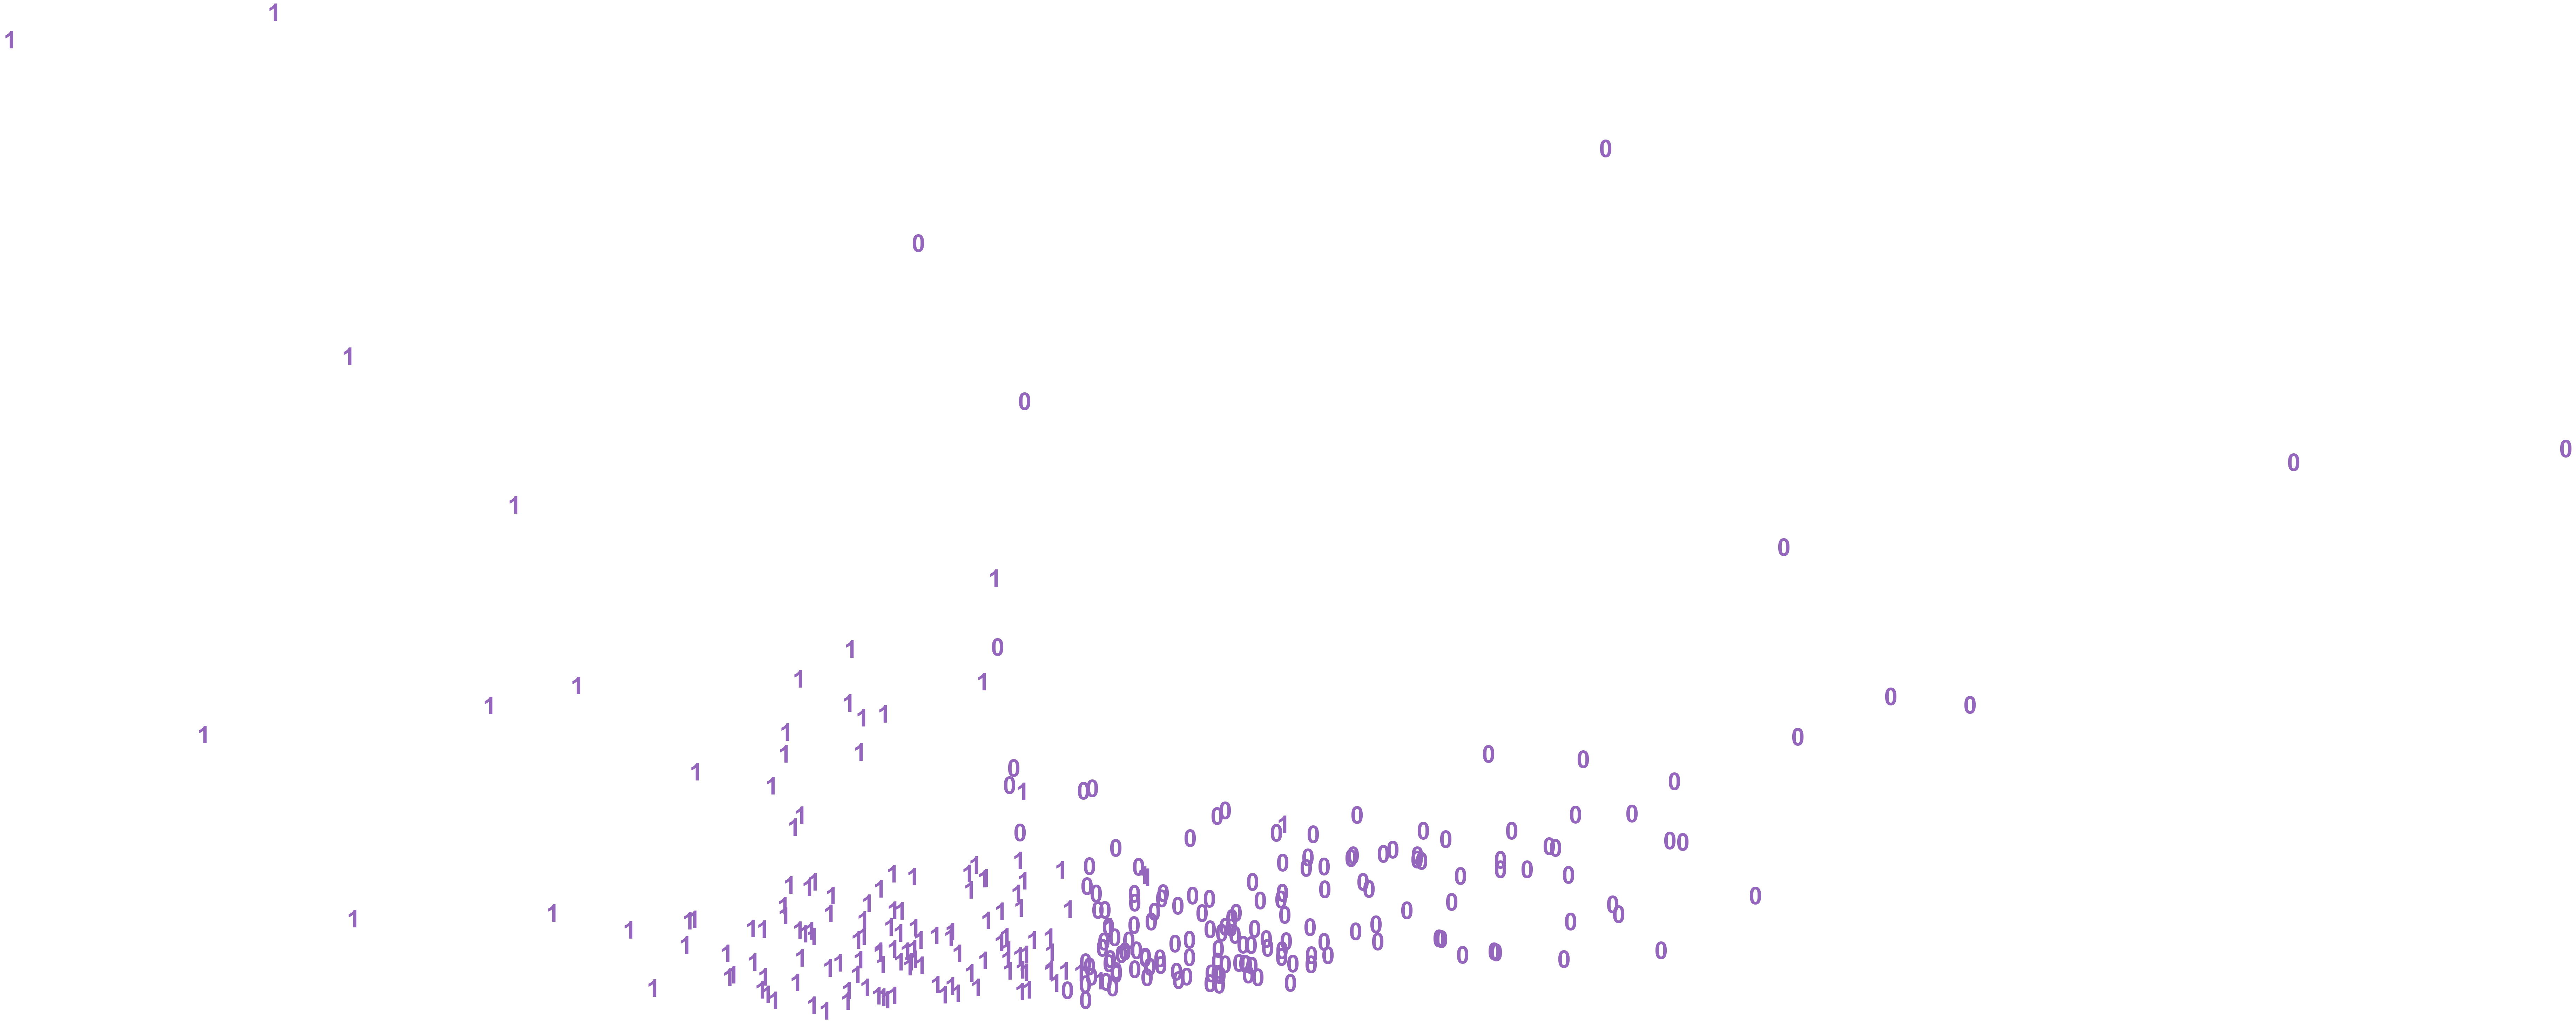

In [293]:
plt.figure(figsize=(10,5))
colours = 'tab:purple'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours,
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [294]:
print("Adjusted Rand Index of the KMeans solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred)))

print("The silhouette score of the KMeans solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

Adjusted Rand Index of the KMeans solution: 0.004921863440606127
The silhouette score of the KMeans solution: 0.23340111791976


In [295]:
from sklearn.manifold import TSNE

In [296]:
print(X.shape, y.shape)

(299, 4) (299,)


In [297]:
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(X)
print("t-SNE done! Time elapsed: {} seconds".format(time.time() - time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 299 samples in 0.000s...
[t-SNE] Computed neighbors for 299 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 299 / 299
[t-SNE] Mean sigma: 8761.895375


C:\Users\rakim\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rakim\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.148170
[t-SNE] KL divergence after 300 iterations: 0.101597
t-SNE done! Time elapsed: 0.23148536682128906 seconds


In [298]:
plt.figure(figsize=(10,5))
colours = 'tab:purple'
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y.iloc[i]),
             color=colours,
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [299]:
from sklearn.cluster import DBSCAN

In [300]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps = 1, min_samples = 5)

# Fit model

dbclusters = dbscan_cluster.fit_predict(X_std)


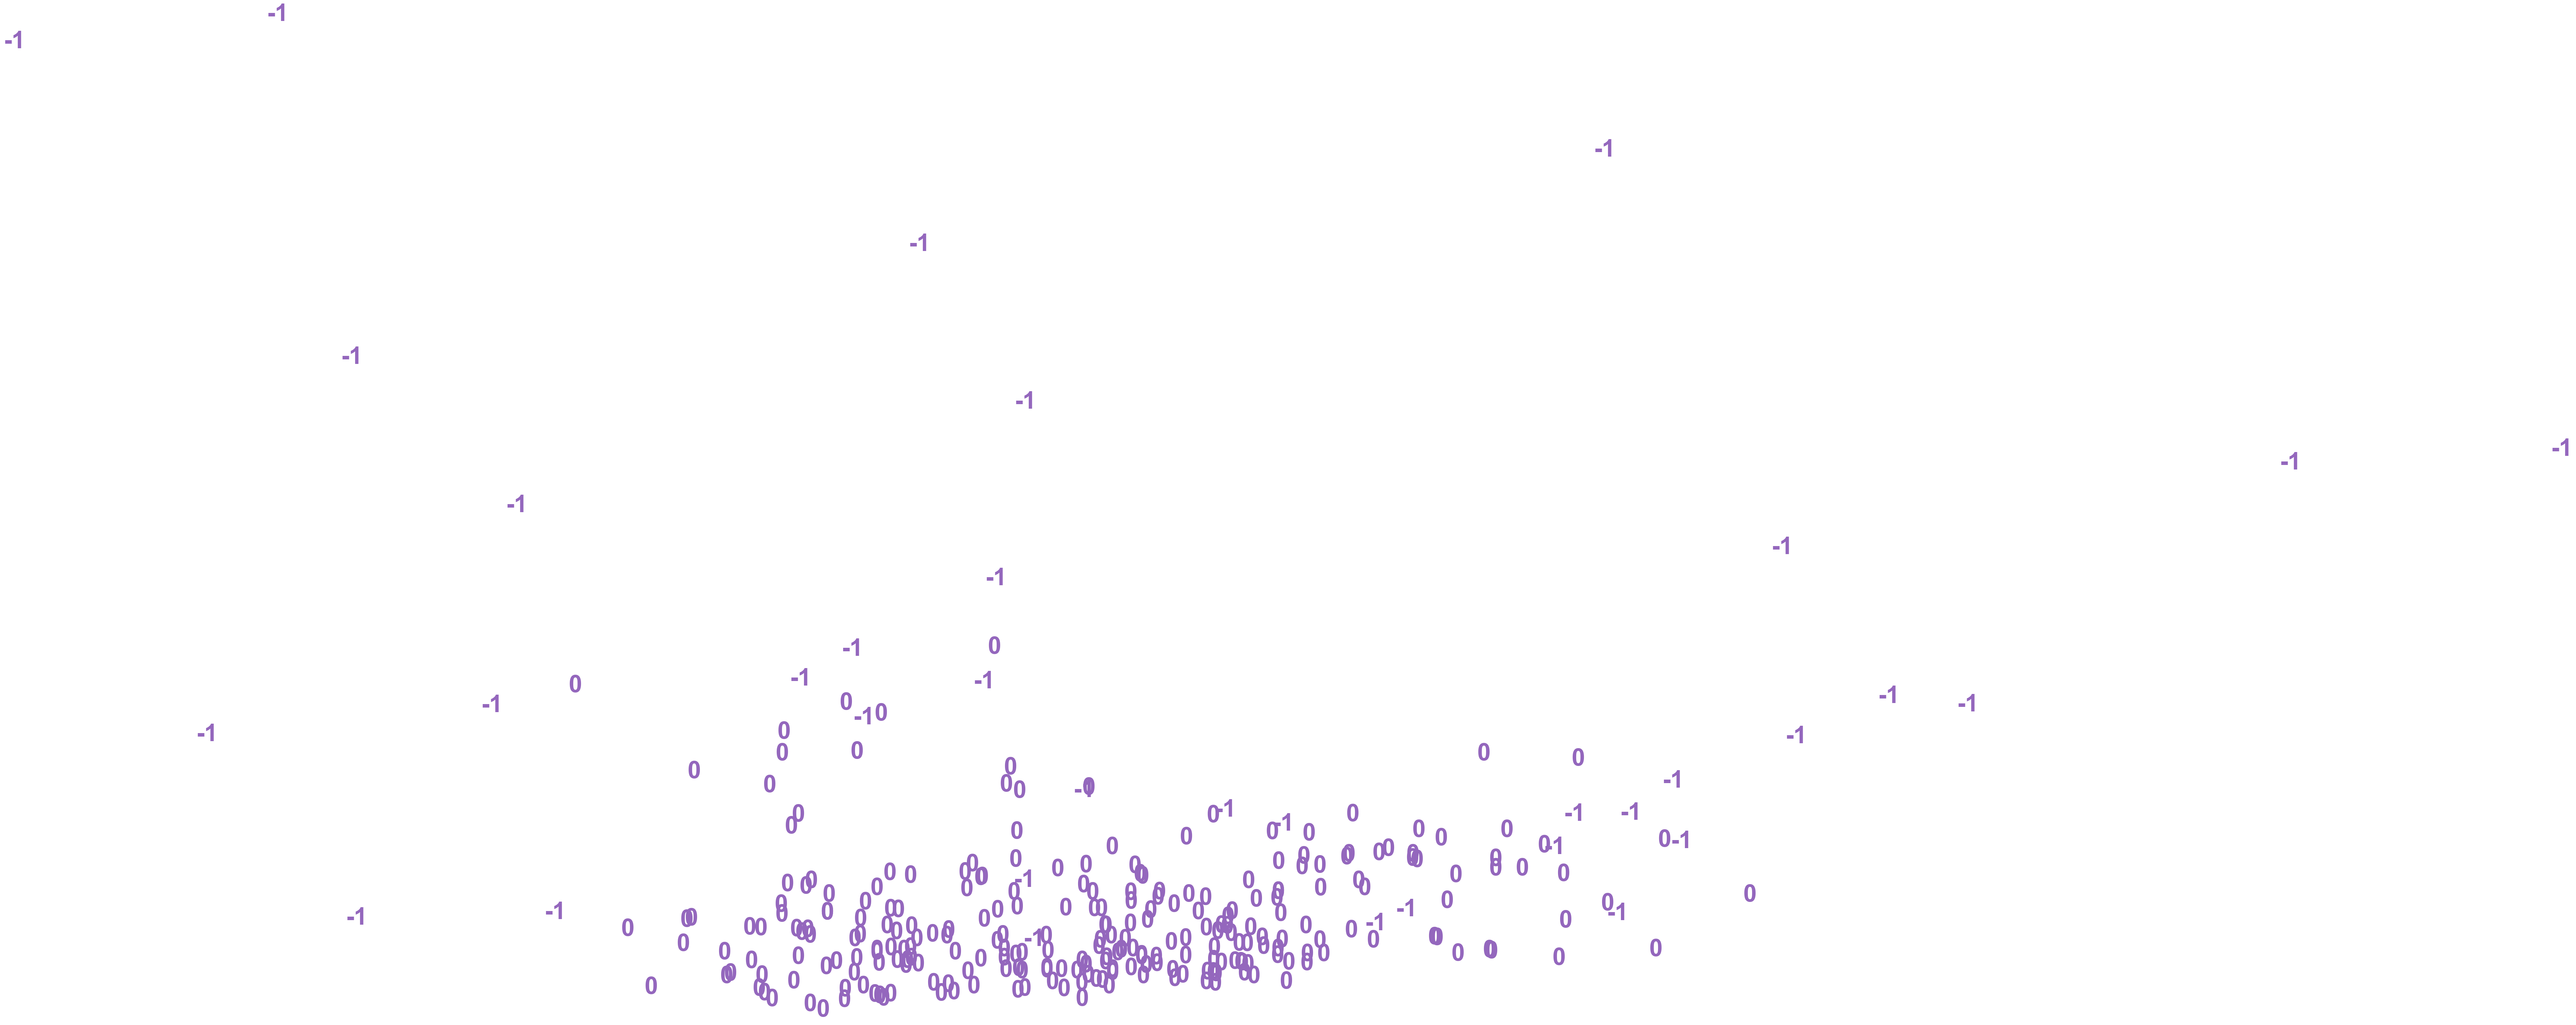

In [301]:
plt.figure(figsize=(10,5))
colours = 'tab:purple'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(dbclusters[i]),
             color=colours,
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [302]:
# Modeling DBSCAN with Euclidean distance

print("The silhouette score of the DBSCAN solution with Euclidean: {}"
      .format(metrics.silhouette_score(X_std, dbclusters, metric='euclidean')))

print("Adjusted Rand Index of the DBSCAN solution with Euclidean: {}"
      .format(metrics.adjusted_rand_score(y, dbclusters)))

The silhouette score of the DBSCAN solution with Euclidean: 0.48663924510932016
Adjusted Rand Index of the DBSCAN solution with Euclidean: 0.004702962183586816


In [303]:
# Here is the BEST DBSCAN model (at first glance on paper) with Chebyshev distance metric.
# But healthcare data is most likely not the appropriate use case per the literature. 
# Chebyshev distance is used most commonly in logistics. 

print("The silhouette score of the DBSCAN solution with Chebyshev distance: {}"
      .format(metrics.silhouette_score(X_std, dbclusters, metric='chebyshev')))

The silhouette score of the DBSCAN solution with Chebyshev distance: 0.5042578397412821


In [304]:
# K-Means with Euclidean distance model. 

print("Adjusted Rand Index of the KMeans solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred)))

print("The silhouette score of the KMeans solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

Adjusted Rand Index of the KMeans solution: 0.004921863440606127
The silhouette score of the KMeans solution: 0.23340111791976


In [305]:
print("Adjusted Rand Index of the GMM solution: {}"
     .format(metrics.adjusted_rand_score(y, gm_clusters)))

print("The silhouette score of the GMM solution: {}"
     .format(metrics.silhouette_score(X_std, gm_clusters, metric = "euclidean")))

Adjusted Rand Index of the GMM solution: 0.019898345652120942
The silhouette score of the GMM solution: 0.18673999770639643


It looks like a common thread between these models is a bad adjusted rand score and a so-so silhouette score (excluding the DBSCAN model).

To streamline this report, I am listing the original findings in this cell. I used all of the features in these models.
Overall, the models performed far, far, wortst with all the features included. Upon research on heart failure, I learned there are
only a couple features relate to sudden death for heart failure patients. Thus, I dropped the irrelevant features in the models 
above and below this cell. The results for the silhouette scores improved remarkably. 


Gaussian Mixture Model (GMM) w/ PCA results

Adjusted Rand Index of the GMM solution: 0.11506460033654581
The silhouette score of the GMM solution: 0.11758319523287136

K Means w/ PCA results

Adjusted Rand Index of the KMeans solution: 0.06821745068708354
The silhouette score of the KMeans solution: 0.13333462466066678

DBSCAN w/ PCA Results

Adjusted Rand Index of the DBSCAN solution: 0.022224065328002855
The silhouette score of the DBSCAN solution: -0.16099376287734668

TSNE Results

This model was a squiggly line, almost linear. I did not think this best reflected
the type of data analyzed -- especially for clustering. I chose PCA because it did a better 
job producing clusters. 


The second attempt model run produced the final results found in this report. The results from the model above differ by about +/- .02 on re-run. But the same conclusions are upheld.   

I included the models below to see if other clustering algorithms would perform well. At the very least, the aim was to 
see if the algorithms created better clusters on a plot. Overall, BIRCH and spectral clustering did a good job forming 
two clusters with minimal misclassifications (BIRCH) or no misclassifications (spectral clustering). In addition,
we can see a distinction of the patients with high values (most at risk for sudden death) and low values (least at risk for sudden death). 

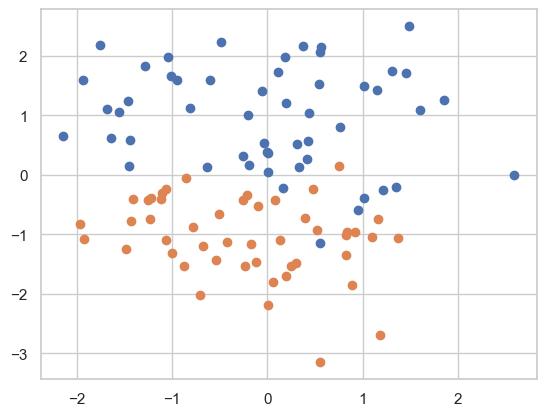

In [306]:
# BIRCH clustering algorithm


from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=123)
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()



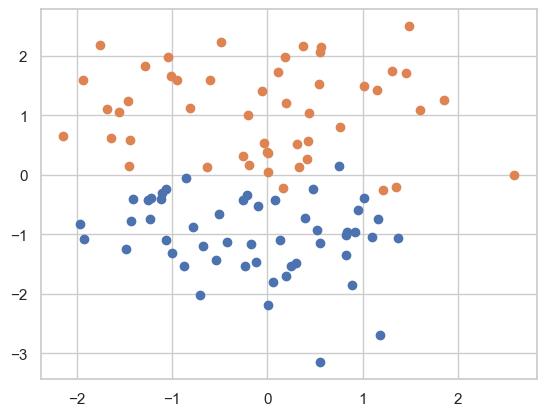

In [307]:
# Spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=123)
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()




In [308]:
# OPTICS clustering algorithm

from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs

# Fit the OPTICS model
clustering = OPTICS(min_samples=20, xi=.05, min_cluster_size=.05)
opt = clustering.fit(X)
 
# Extract the clusters
labels = clustering.labels_
 
# Print the cluster labels
print("Cluster Labels:", labels)

Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Estimated no. of clusters: 1
Estimated no. of noise points: 0


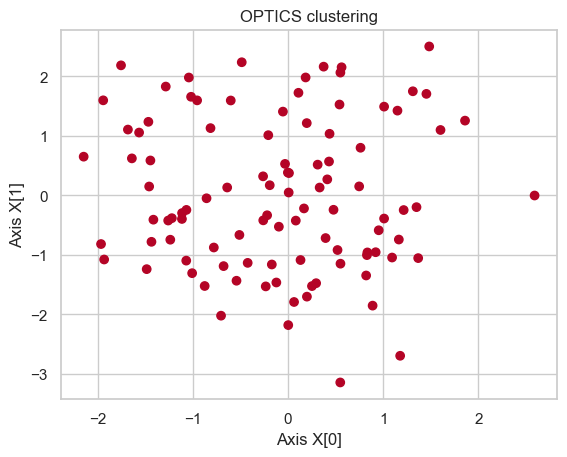

In [309]:
# Configuration options

num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 5.0
min_samples = 37
cluster_method = 'xi'
metric = 'euclidean'

# Compute OPTICS
db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

# This analyst suspects DBSCAN works best because this type of data is more about a population of risk profiles for a health condition.

Therfore, it is less about how far the individuals are from one another. It is more about whether or not a dense collection
of individuals are in a particular area and determining whether they are high risk or not. 


# Original Findings were: 
    

# Gaussian Mixture Model (GMM) w/ PCA results

Adjusted Rand Index of the GMM solution: 0.11506460033654581
The silhouette score of the GMM solution: 0.11758319523287136

# K Means w/ PCA results

Adjusted Rand Index of the KMeans solution: 0.06821745068708354
The silhouette score of the KMeans solution: 0.13333462466066678

# DBSCAN w/ PCA Results

Adjusted Rand Index of the DBSCAN solution: 0.022224065328002855
The silhouette score of the DBSCAN solution: -0.16099376287734668

# TSNE Results

This model was a squiggly line, almost linear. I did not think this best reflected
the type of data analyzed -- especially for clustering. I chose PCA because it did a better 
job producing clusters. 


# Final Results 



# DBSCAN w/ PCA Results

The silhouette score of the DBSCAN solution with Euclidean: 0.4572246497012825.

Adjusted Rand Index of the DBSCAN solution with Euclidean: 0.003593655067798663.

The silhouette score of the DBSCAN solution with Chebyshev distance: 0.47315988515382557


# K-Means w/ PCA Results

Adjusted Rand Index of the KMeans solution: 0.004175926402351372
The silhouette score of the KMeans solution: 0.23125622798405496


# GMM w/ PCA Results

Adjusted Rand Index of the GMM solution: 0.020601096841243217
The silhouette score of the GMM solution: 0.22824263534337996


# Conclusion

The DBSCAN w/ PCA and Chebyshev distance performed best. However, Chebyshev distance is 
known to work well for certain. This distance measure is not known to apply for health data.
Chebyshev distance is also known as chessboard distance since this metric is defined on a vector space 
where the distance between two vectors is the greatest of their differences along any coordinate dimension."

For example, the Chebyshev distance is sometimes used in warehouse logistics. 
Therefore, I chose the DBSCAN with Euclidean distance since it performed nearly as well. 
In addition, density is better method of interpreting clusters of disease risk compared to movement along a given space.


In the clusters, those points higher up on the plot have higher amounts and those lower on the plots have lower amounts.

BIRCH, OPTICS and spectral clustering were used to see if other clustering algorithms might be a better fit than K-Means, DBSCAN or GMM. There might be merit to pursuing spectral clustering. BIRCH clustering miscalssified one point while spectral clustering properly classified all the points. 

Spectral clustering uses the connectivity between data points to form the clusters -- instead of a distance measure. This appears to work better than the other algorithms tested on a plot. Future applications can examine whether this 
clustering method or others are more effective than the chosen model. 

This capstone illustrates the viability of using clustering methods to segment patients who may be at risk of heart failure. Other data transformations like UMAP may be useful to improve results.